In [6]:
import xgboost as xgb
import catboost as cb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



In [4]:
data = pd.read_csv('/Users/elgun/Desktop/Machine_Learning_Project/data/classification.csv')
data

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,95074,421802,II,>10yrs,Vfied,633600.00,MORTGAGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,RENT,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,RENT,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,RENT,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,RENT,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87495,120884,4535984,II,>10yrs,Not Vfied,75680.00,RENT,0,0,Engineer Support II,...,whole,MI,12,32702.0,3 years,10012.05,debt consolidation,I,0.0,0
87496,33259,2624710,IV,3yrs,Source Verified,90423.52,RENT,0,0,Dental Hygienist,...,whole,MA,23,32204.0,5 years,24921.54,debt consolidation,I,0.0,0
87497,102153,5966919,II,>10yrs,Source Verified,91520.00,MORTGAGE,0,0,Interface Coordinator,...,fully paid,CT,8,29050.0,3 years,14517.90,debt consolidation,I,0.0,0
87498,115343,2630667,III,1yrs,Source Verified,61600.00,MORTGAGE,0,0,PARTS CLERK,...,whole,PA,11,24900.0,3 years,8454.24,debt consolidation,I,0.0,0


                   ID      Asst_Reg GGGrade Experience       Validation  \
count    87500.000000  8.750000e+04   87500      87500            87500   
unique            NaN           NaN       7         11                3   
top               NaN           NaN      II     >10yrs  Source Verified   
freq              NaN           NaN   24966      30849            34504   
mean     83946.253509  3.798914e+06     NaN        NaN              NaN   
std      36100.102950  2.289038e+06     NaN        NaN              NaN   
min      21560.000000  2.484700e+04     NaN        NaN              NaN   
25%      52616.750000  1.483874e+06     NaN        NaN              NaN   
50%      83900.000000  4.132010e+06     NaN        NaN              NaN   
75%     115261.250000  5.952909e+06     NaN        NaN              NaN   
max     146559.000000  7.351847e+06     NaN        NaN              NaN   

        Yearly_Income Home_Status  Unpaid_2_years  Already_Defaulted  \
count    8.192500e+04      

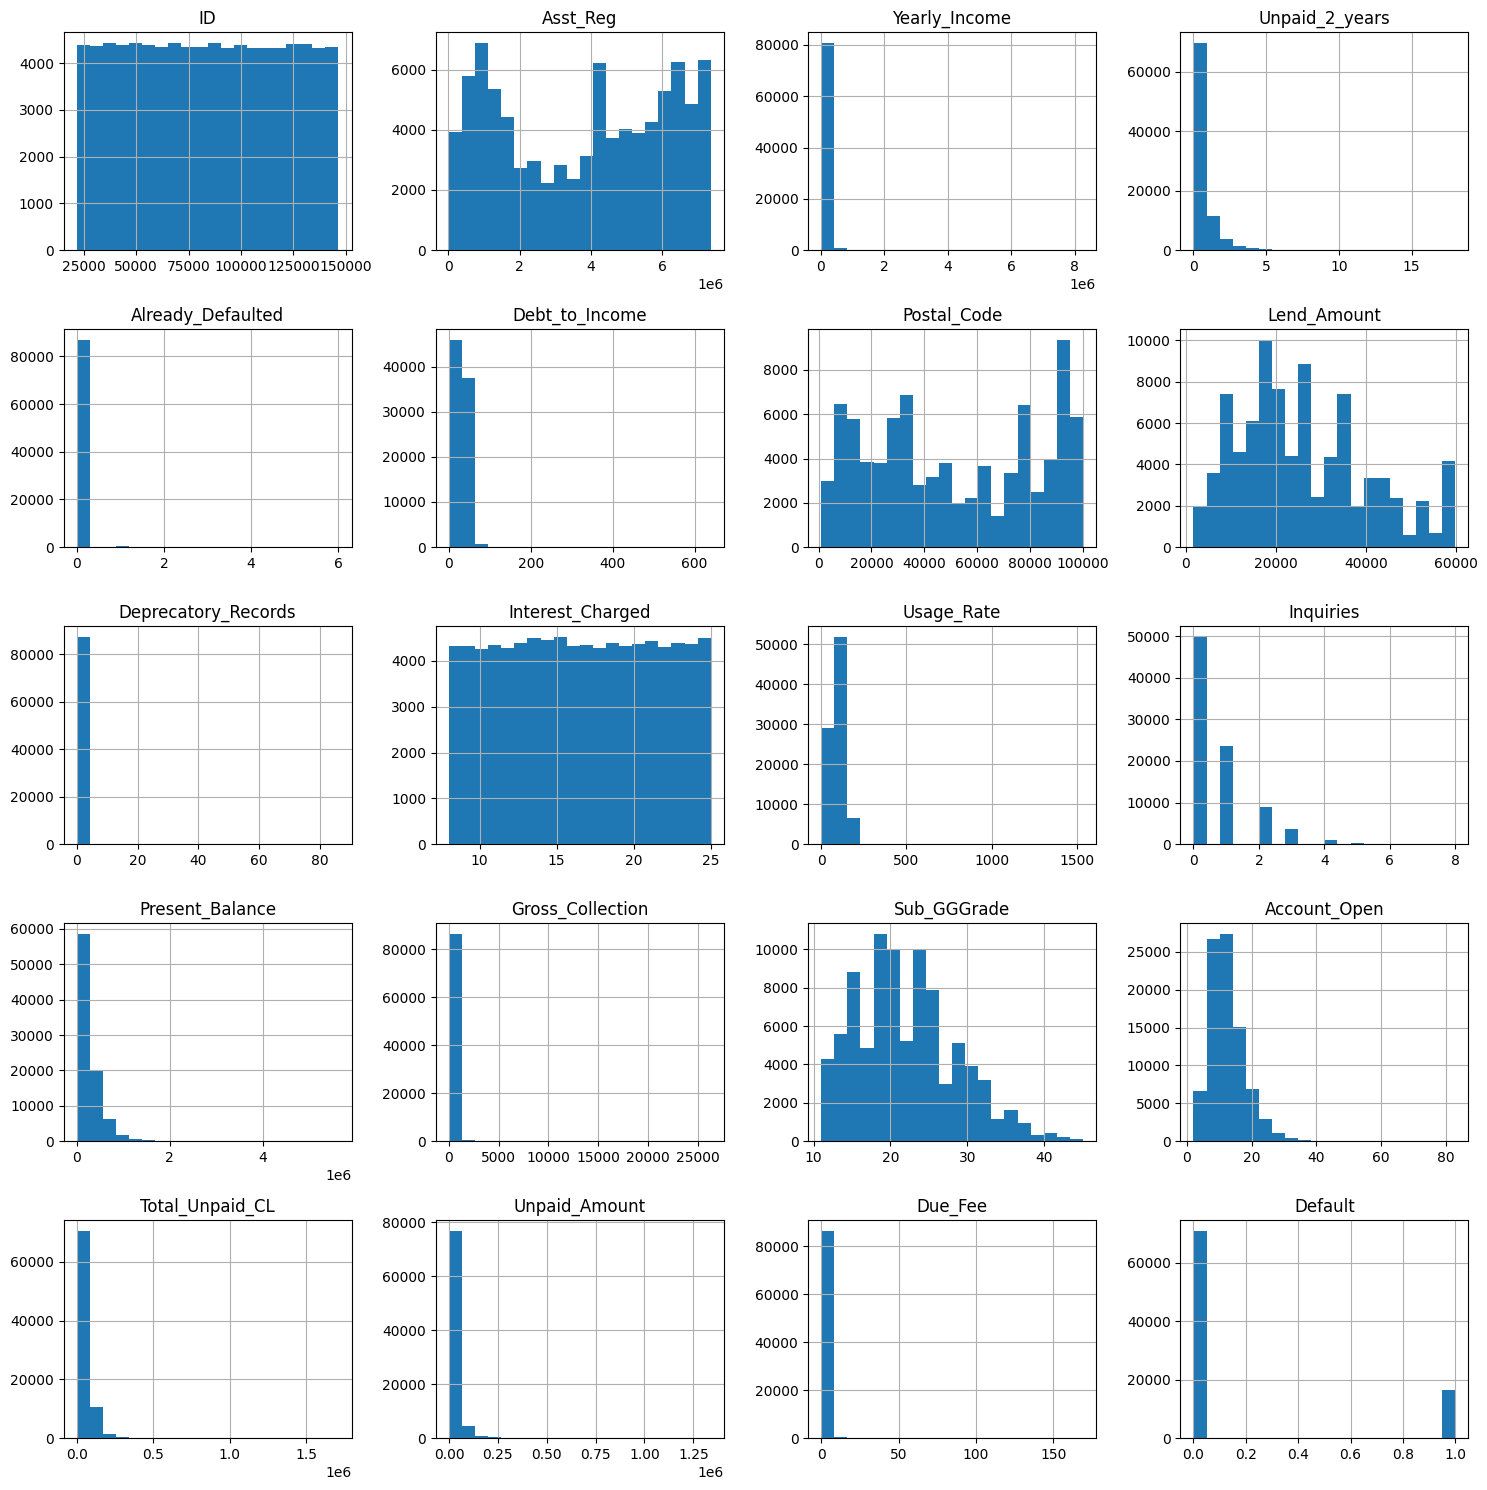

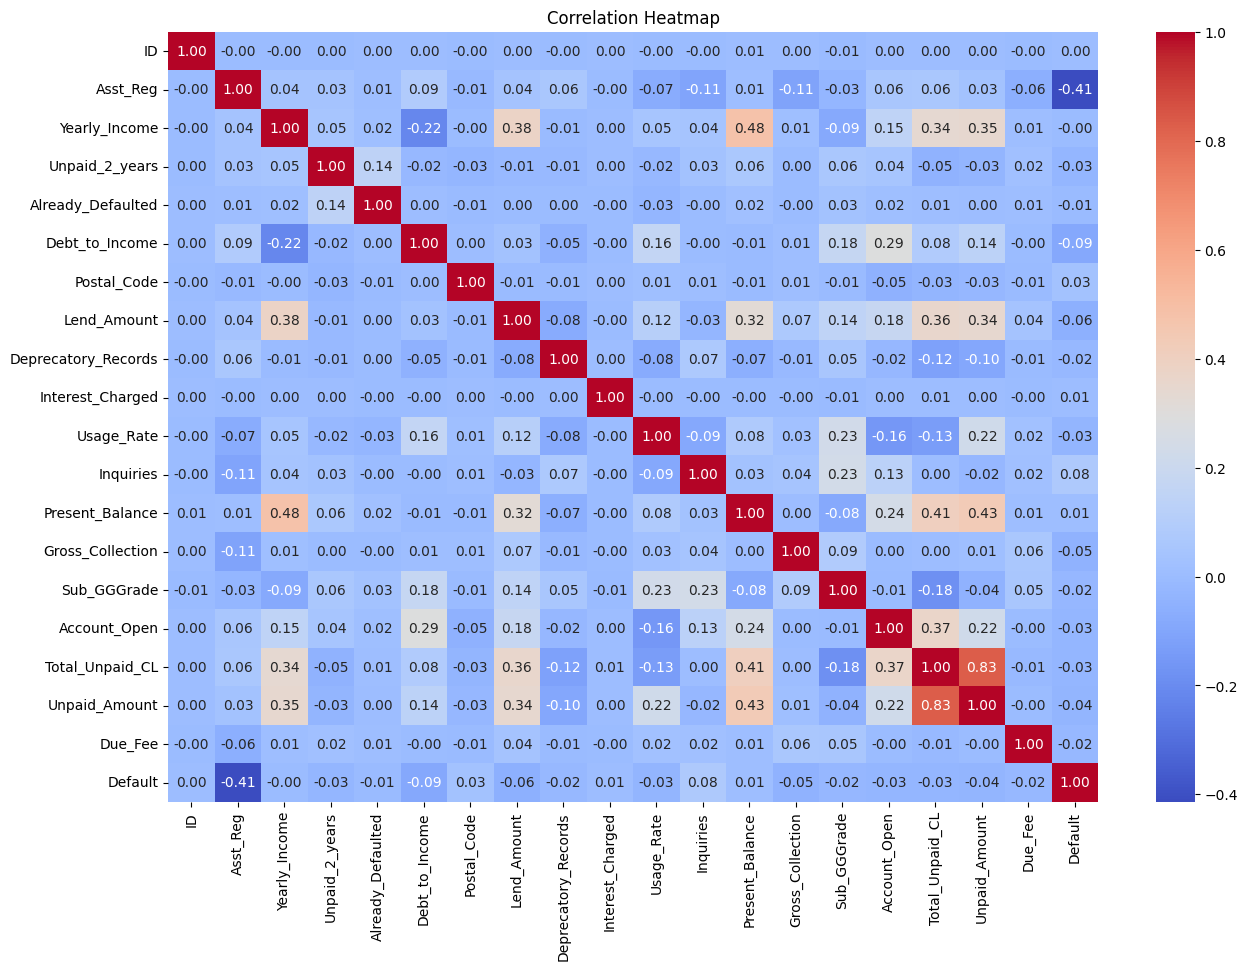

In [9]:
import seaborn as sns

import matplotlib.pyplot as plt

# Display basic statistics
print(data.describe(include='all'))

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Visualize the distribution of numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_features].hist(figsize=(15, 15), bins=20, layout=(5, 4))
plt.tight_layout()
# Exclude non-numeric columns for correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer with a strategy to fill missing values
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the numerical features
data[numerical_features] = imputer.fit_transform(data[numerical_features])

# Display the first few rows of the data after handling NaN values
data.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,0.588117,0.054177,1,10,2,0.075685,0,0.0,0.0,12862,...,0,6,0.185185,0.034068,0,0.023317,3,0,0.0,0.0
1,0.900575,0.537664,3,6,1,0.009289,4,0.0,0.0,4177,...,1,25,0.160494,0.010871,1,0.008710,3,0,0.0,0.0
2,0.568341,0.576322,2,9,1,0.008528,4,0.0,0.0,36011,...,1,9,0.061728,0.008929,1,0.004211,6,0,0.0,0.0
3,0.008248,0.023520,2,9,2,0.006396,4,0.0,0.0,2918,...,0,31,0.086420,0.012909,0,0.011658,6,0,0.0,1.0
4,0.828007,0.630795,4,1,1,0.007178,4,0.0,0.0,16887,...,0,16,0.098765,0.020868,1,0.020521,3,0,0.0,0.0


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the first few rows of the scaled data
data.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,0.588117,0.054177,1,10,2,0.075685,0,0.0,0.0,12862,...,0,6,0.185185,0.034068,0,0.023317,3,0,0.0,0.0
1,0.900575,0.537664,3,6,1,0.009289,4,0.0,0.0,4177,...,1,25,0.160494,0.010871,1,0.008710,3,0,0.0,0.0
2,0.568341,0.576322,2,9,1,0.008528,4,0.0,0.0,36011,...,1,9,0.061728,0.008929,1,0.004211,6,0,0.0,0.0
3,0.008248,0.023520,2,9,2,0.006396,4,0.0,0.0,2918,...,0,31,0.086420,0.012909,0,0.011658,6,0,0.0,1.0
4,0.828007,0.630795,4,1,1,0.007178,4,0.0,0.0,16887,...,0,16,0.098765,0.020868,1,0.020521,3,0,0.0,0.0


In [19]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical feature
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

# Display the first few rows of the encoded data
data.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,0.588117,0.054177,1,10,2,0.075685,0,0.0,0.0,12862,...,0,6,0.185185,0.034068,0,0.023317,3,0,0.0,0.0
1,0.900575,0.537664,3,6,1,0.009289,4,0.0,0.0,4177,...,1,25,0.160494,0.010871,1,0.008710,3,0,0.0,0.0
2,0.568341,0.576322,2,9,1,0.008528,4,0.0,0.0,36011,...,1,9,0.061728,0.008929,1,0.004211,6,0,0.0,0.0
3,0.008248,0.023520,2,9,2,0.006396,4,0.0,0.0,2918,...,0,31,0.086420,0.012909,0,0.011658,6,0,0.0,1.0
4,0.828007,0.630795,4,1,1,0.007178,4,0.0,0.0,16887,...,0,16,0.098765,0.020868,1,0.020521,3,0,0.0,0.0


In [20]:
# Split the data into training and testing sets
X = data.drop(columns=['Default', 'ID'])
y = data['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (70000, 28)
X_test shape: (17500, 28)
y_train shape: (70000,)
y_test shape: (17500,)


Accuracy: 0.8287428571428571
Precision: 0.6246624662466247
ROC AUC: 0.8116551590044677


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


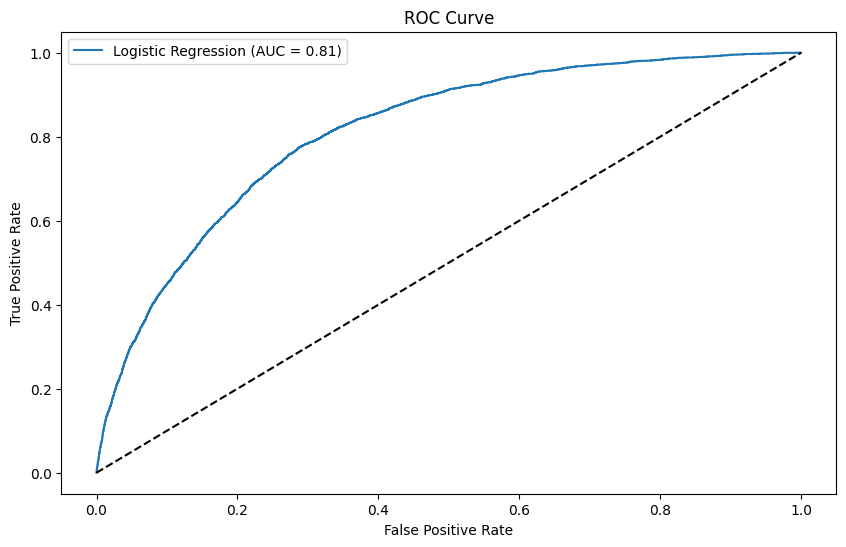

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, roc_curve

import matplotlib.pyplot as plt

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:22] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:23] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:24] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, subsample=1.0; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:25] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:25] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:26] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:26] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:28] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END learning_rate=0.1, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:29] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:29] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:30] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:30] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:31] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:31] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:32] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:32] WARNING: /Users/runner/work/xgboost/xgboost/src

[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8418285714285715
Precision: 0.6940184049079755
ROC AUC: 0.8367087789820337


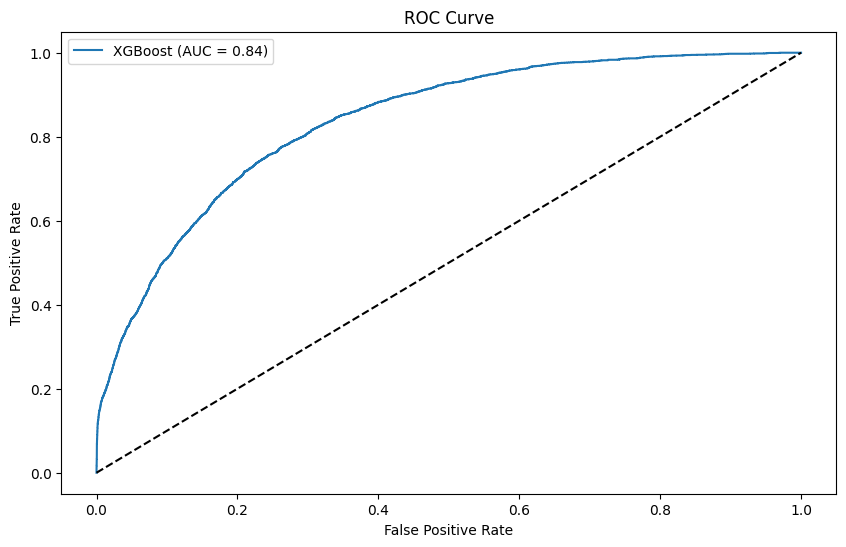

In [25]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize the XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=True, eval_metric='logloss')

# Initialize GridSearchCV with the XGBClassifier and parameter grid
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from GridSearchCV
best_xgb = grid_search.best_estimator_

# Predict on the test data
y_pred_xgb = best_xgb.predict(X_test)
y_pred_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb}")

# Calculate precision
precision_xgb = precision_score(y_test, y_pred_xgb)
print(f"Precision: {precision_xgb}")

# Calculate ROC AUC
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"ROC AUC: {roc_auc_xgb}")

# Plot ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   1.8s
[CV] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   1.8s
[CV] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   1.9s
[CV] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   2.0s
[CV] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   2.0s
[CV] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   1.9s
[CV] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.2; total time=   1.9s
[CV] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.2; total time=   2.0s
[CV] END depth=3, iterations=100, l2_leaf_reg=1, learning_rate=0.2; total time=   2.0s
[CV] END depth=3, iterations=100, l2_leaf_reg=3, learning_rate=0.1; total time=   2.0s
[CV] END depth=3, iterations=100, l2_leaf_reg=3, learning_rate=0.

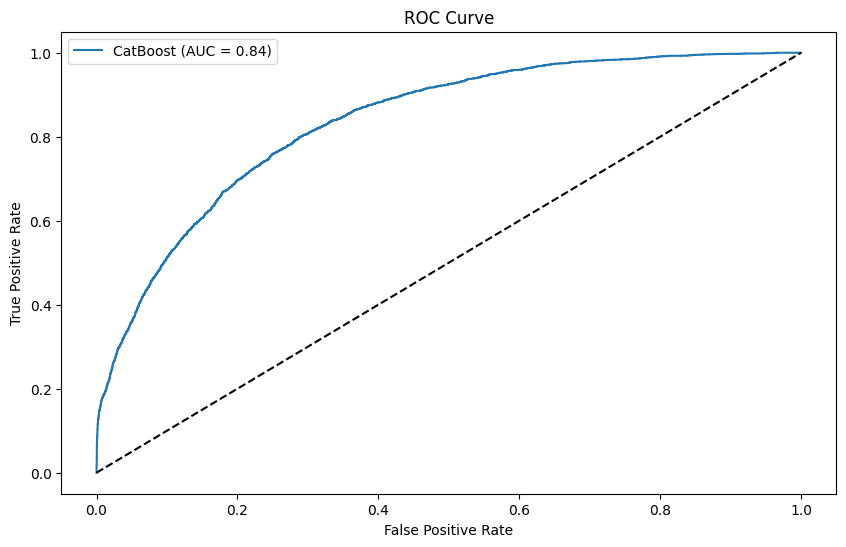

In [26]:
from catboost import CatBoostClassifier

# Define the parameter grid for GridSearchCV
param_grid_cb = {
    'iterations': [100, 200],
    'depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

# Initialize the CatBoostClassifier
cb_clf = CatBoostClassifier(eval_metric='Logloss', silent=True)

# Initialize GridSearchCV with the CatBoostClassifier and parameter grid
grid_search_cb = GridSearchCV(estimator=cb_clf, param_grid=param_grid_cb, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV on the training data
grid_search_cb.fit(X_train, y_train)

# Get the best estimator from GridSearchCV
best_cb = grid_search_cb.best_estimator_

# Predict on the test data
y_pred_cb = best_cb.predict(X_test)
y_pred_proba_cb = best_cb.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy_cb = accuracy_score(y_test, y_pred_cb)
print(f"Accuracy: {accuracy_cb}")

# Calculate precision
precision_cb = precision_score(y_test, y_pred_cb)
print(f"Precision: {precision_cb}")

# Calculate ROC AUC
roc_auc_cb = roc_auc_score(y_test, y_pred_proba_cb)
print(f"ROC AUC: {roc_auc_cb}")

# Plot ROC curve
fpr_cb, tpr_cb, _ = roc_curve(y_test, y_pred_proba_cb)
plt.figure(figsize=(10, 6))
plt.plot(fpr_cb, tpr_cb, label=f'CatBoost (AUC = {roc_auc_cb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [27]:
# Compare the performance of the models
models = {
    'Logistic Regression': {
        'accuracy': accuracy,
        'precision': precision,
        'roc_auc': roc_auc
    },
    'XGBoost': {
        'accuracy': accuracy_xgb,
        'precision': precision_xgb,
        'roc_auc': roc_auc_xgb
    },
    'CatBoost': {
        'accuracy': accuracy_cb,
        'precision': precision_cb,
        'roc_auc': roc_auc_cb
    }
}

# Display the comparison
comparison_df = pd.DataFrame(models).T
print(comparison_df)

# Identify the best model based on accuracy
best_model = comparison_df['accuracy'].idxmax()
print(f"The best model based on accuracy is: {best_model}")

                     accuracy  precision   roc_auc
Logistic Regression  0.828743   0.624662  0.811655
XGBoost              0.841829   0.694018  0.836709
CatBoost             0.842343   0.701329  0.835743
The best model based on accuracy is: CatBoost
